In [1]:
%matplotlib inline

Blog 1

In [ ]:
%matplotlib inline

In [ ]:
from pymc3 import *

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)

true_regression_line = true_intercept + true_slope * x

y = true_regression_line + np.random.normal(scale=.5, size=size)


data = dict(x=x, y=y)

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [ ]:
with Model() as model:
    # define priors
    sigma = HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = Normal("intercept", 0, sd=20)
    x_coeff = Normal("x", 0, sd=20)
    
    # define likelihood
    likelihood = Normal("y", mu=intercept + x_coeff * x,
                       sd=sigma, observed=y)
    
    # inference!
    trace = sample(progressbar=False)

In [ ]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # all its parameters are automatically added to our model.
    GLM.from_formula("y ~ x", data)
    trace = sample(progressbar=False, tune=1000, chains=4)

In [ ]:
plt.figure(figsize=(7,7))
traceplot(trace)
plt.tight_layout();

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(x, y, "x", label="data")
plots.plot_posterior_predictive_glm(trace, samples=100,
                                    label="posterior predictive regression lines")
plt.plot(x, true_regression_line, label="true regression line", lw=3., c="y")
plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y")


Blog 2

In [3]:
import pymc3 as pm

import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [4]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)

true_regression_line = true_intercept + true_slope * x

y = true_regression_line + np.random.normal(scale=.5, size=size)

# add outliers
x_out = np.append(x, [.1, .15, .2])
y_out = np.append(y, [8, 6, 9])

data = dict(x=x_out, y=y_out)

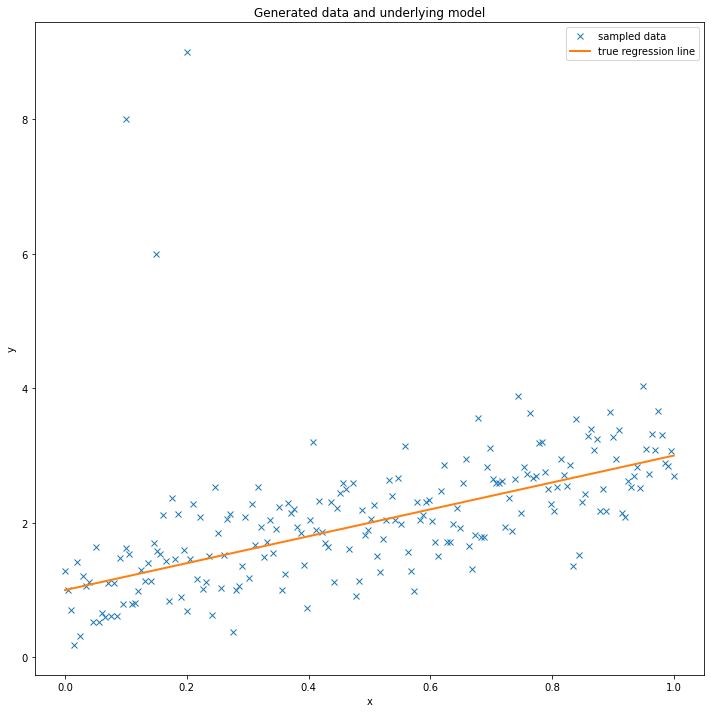

In [5]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [8]:
with pm.Model() as model:
    pm.GLM.from_formula("y ~ x", data)
    trace = pm.sample(progressbar=False, tune=1000, chains=4)

/opt/anaconda3/envs/mc3env/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
The acceptance probability does not match the target. It is 0.8876516663586815, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.885756354216734, but should be close to 0.8. Try to increase the number of tuning steps.


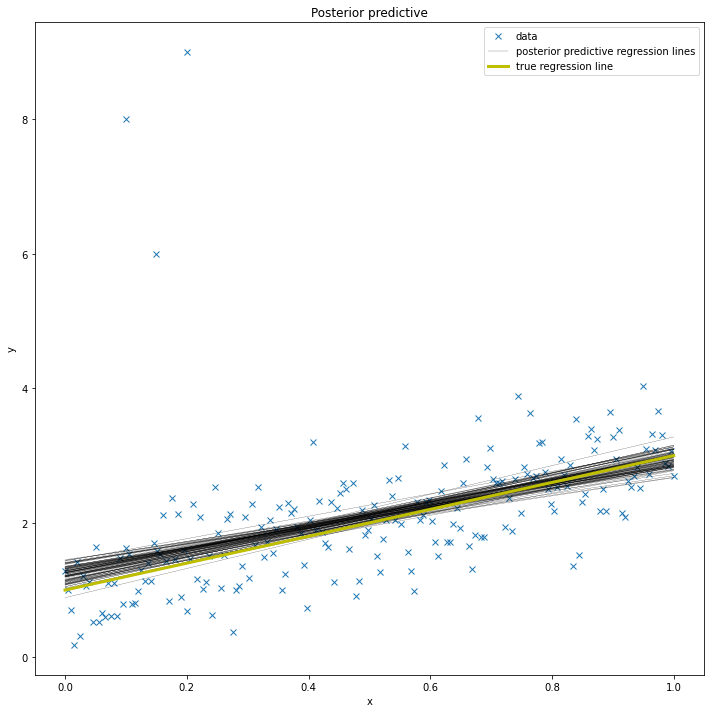

In [12]:
plt.figure(figsize=(12, 12))
plt.subplot(111, xlabel="x", ylabel="y",
            title="posterior predictive regression lines")
plt.plot(x_out, y_out, "x", label="data")
pm.plots.plot_posterior_predictive_glm(trace, samples=100,
                                       label="posterior predictive regression lines")
plt.plot(x, true_regression_line,
         label="true regression line", lw=3., c="y")
plt.legend(loc=0)

/opt/anaconda3/envs/mc3env/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
The acceptance probability does not match the target. It is 0.8844458189850987, but should be close to 0.8. Try to increase the number of tuning steps.


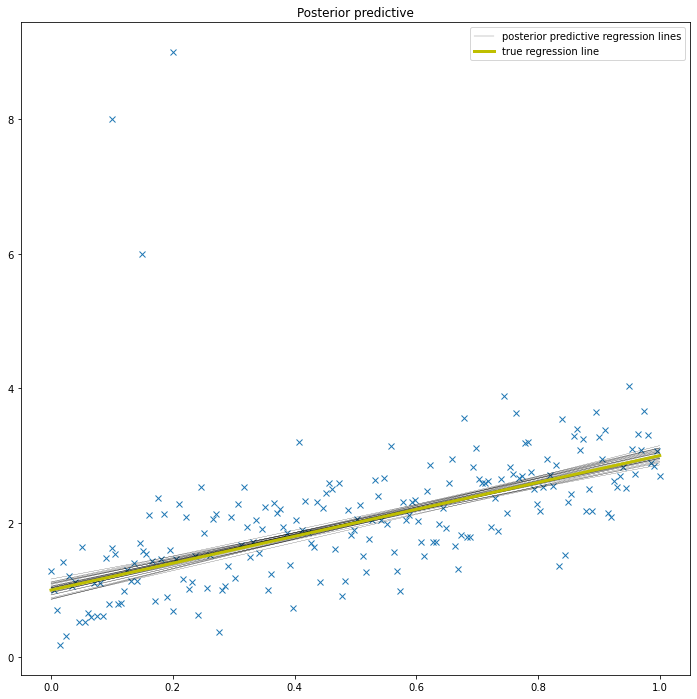

In [11]:
with pm.Model() as model_robust:
    family = pm.glm.families.StudentT()
    pm.GLM.from_formula("y ~ x", data, family=family)
    trace_robust = pm.sample(tune=1000)
    
plt.figure(figsize=(12, 12))
plt.plot(x_out, y_out, "x")
pm.plots.plot_posterior_predictive_glm(trace_robust,
                                       label = "posterior predictive regression lines")
plt.plot(x, true_regression_line,
         label="true regression line",
         lw=3, c="y")
plt.legend();